## **SET UP**

In [ ]:
# upload the images
from google.colab import files

uploaded = files.upload()

Saving A1x1c-1900x2830x175_8b0087.tif to A1x1c-1900x2830x175_8b0087 (2).tif
Saving A1x2e-1905x3450x250_8b0215.tif to A1x2e-1905x3450x250_8b0215 (1).tif
Saving A1x2e-1905x3450x250_8b0237.tif to A1x2e-1905x3450x250_8b0237 (1).tif
Saving A1x5c-1905x3495x220_8b0056.tif to A1x5c-1905x3495x220_8b0056 (1).tif
Saving A1x5e-1910x3470x225_8b0051.tif to A1x5e-1910x3470x225_8b0051 (1).tif
Saving A1x10c-1905x3460x230_8b0002.tif to A1x10c-1905x3460x230_8b0002 (1).tif
Saving B1x1e-1910x3460x230_8b0229.tif to B1x1e-1910x3460x230_8b0229 (1).tif
Saving B1x10e-1900x3500x330_8b0329.tif to B1x10e-1900x3500x330_8b0329 (2).tif


In [ ]:
# upload the labled data
label_uploaded = files.upload()

Saving A1x1c-1900x2830x175_8b0087_label_not_corrected.tif to A1x1c-1900x2830x175_8b0087_label_not_corrected (1).tif
Saving A1x2e-1905x3450x250_8b0215_label_not_corrected.tif to A1x2e-1905x3450x250_8b0215_label_not_corrected (1).tif
Saving A1x2e-1905x3450x250_8b0237_label_not_corrected.tif to A1x2e-1905x3450x250_8b0237_label_not_corrected (1).tif
Saving A1x5c-1905x3495x220_8b0056_label_not_corrected.tif to A1x5c-1905x3495x220_8b0056_label_not_corrected (1).tif
Saving A1x5e-1910x3470x225_8b0051_label_not_corrected.tif to A1x5e-1910x3470x225_8b0051_label_not_corrected (1).tif
Saving A1x10c-1905x3460x230_8b0002_label_not_corrected.tif to A1x10c-1905x3460x230_8b0002_label_not_corrected (1).tif
Saving B1x1e-1910x3460x230_8b0229_label_not_corrected.tif to B1x1e-1910x3460x230_8b0229_label_not_corrected (1).tif
Saving B1x10e-1900x3500x330_8b0329_label_not_corrected.tif to B1x10e-1900x3500x330_8b0329_label_not_corrected (1).tif


In [ ]:
# import
! pip install xgboost
import cv2
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score, classification_report
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from google.colab import drive
import sys
from sklearn.utils import shuffle
from xgboost import DMatrix
from xgboost import train as xgb_train
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from joblib import Parallel, delayed
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, precision_score, recall_score
import numpy as np

In [ ]:
drive.mount('/content/drive')
sys.path.append("/content/drive/My Drive/Research Assistant/Data/0. DeepLab code sample")
!ls "/content/drive/My Drive/Research Assistant/Data/0. DeepLab code sample"
from image_processing import make_features

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Convolutional_Autoencoder_COB_copy.ipynb   labeled_data       run_knn.py	     utils.py
 correct_label.py			    __pycache__        stats.py
 image_processing.py			    requirements.txt  'stats visualize.py'


(2830, 1900)
(3450, 1905)
(3450, 1905)
(3495, 1905)
(3470, 1910)
(3460, 1905)
(3460, 1910)
(3500, 1900)


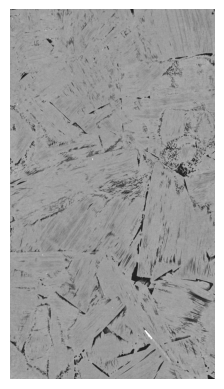

In [ ]:
# Initialize a dataset container
images_dataset = []

# Process and store each uploaded image
for filename in uploaded.keys():
    # Open the image
    image = Image.open(io.BytesIO(uploaded[filename]))

    # convert the image to grayscale
    image = image.convert('L')

    # # Resize the image
    # image = image.resize((256, 256))

    # Convert the image to a numpy array and store it in the dataset
    images_dataset.append(np.array(image))

# Show the first image to verify
print(images_dataset[0].shape)
print(images_dataset[1].shape)
print(images_dataset[2].shape)
print(images_dataset[3].shape)
print(images_dataset[4].shape)
print(images_dataset[5].shape)
print(images_dataset[6].shape)
print(images_dataset[7].shape)

plt.imshow(images_dataset[2], cmap='gray')
plt.axis('off')
plt.show()

(2830, 1900)
(3450, 1905)
(3450, 1905)
(3495, 1905)
(3470, 1910)
(3460, 1905)
(3460, 1910)
(3500, 1900)


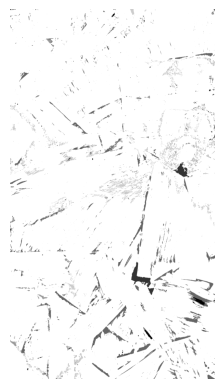

In [ ]:
# Initialize a dataset container for labeled images
labels_dataset = []

for filename in label_uploaded.keys():
    # Open the labeled image
    label_image = Image.open(filename)

    # # Resize the image to match the segmented images
    # label_image = label_image.resize((256, 256))

    # Convert the labeled image to a numpy array and store it
    labels_dataset.append(np.array(label_image))

# Show the first label image to verify
# Show the first image to verify
print(labels_dataset[0].shape)
print(labels_dataset[1].shape)
print(labels_dataset[2].shape)
print(labels_dataset[3].shape)
print(labels_dataset[4].shape)
print(labels_dataset[5].shape)
print(labels_dataset[6].shape)
print(labels_dataset[7].shape)
plt.imshow(labels_dataset[2], cmap='gray')
plt.axis('off')
plt.show()

## **Image Preprocessing**

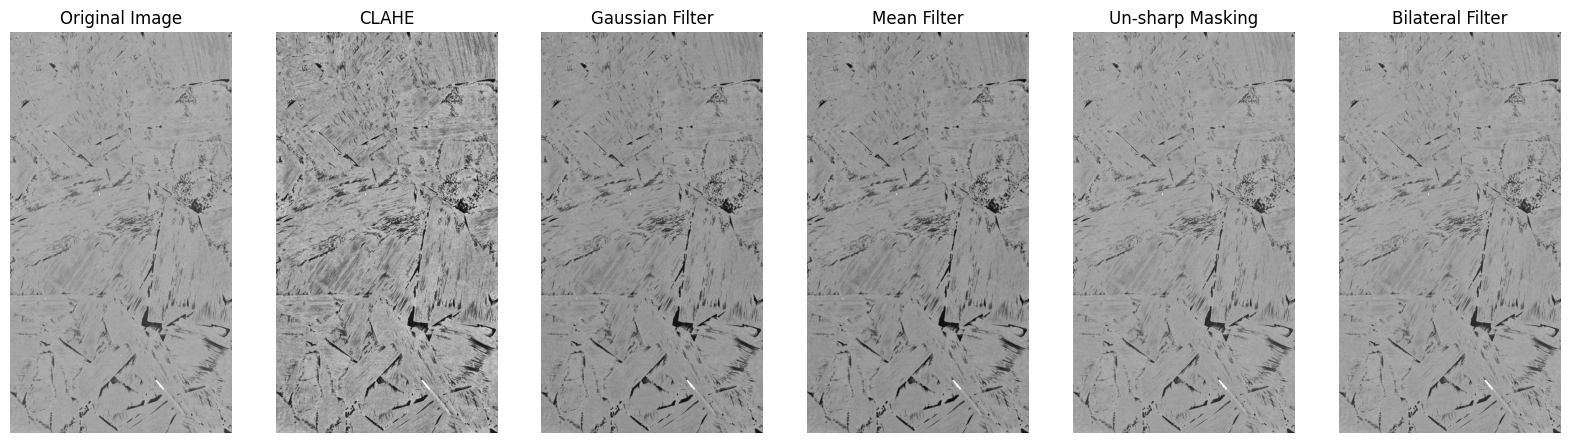

In [ ]:
# Initialize a dataset container to store the enhanced image for different methods
enhanced_images_dataset_CLAHE = []
enhanced_images_dataset_gaussian_filter = []
enhanced_images_dataset_mean_filter = []
enhanced_images_dataset_Us_masking = []
enhanced_images_dataset_bilateral_filter = []

# define a function to enhance the image
def enhance_image(image, method):
    # Convert to grayscale if necessary
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

    # Apply histogram equalization or other enhancement methods
    enhanced = gray
    if method == "CLAHE":
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        enhanced = clahe.apply(gray)
    elif method == "Gaussian Filter":
        enhanced = cv2.GaussianBlur(gray, (5, 5), 0)
    elif method == "Mean Filter":
        kernel_size = (5, 5)
        enhanced = cv2.blur(gray, kernel_size)
    elif method == "Un-sharp Masking":
        gaussian = cv2.GaussianBlur(gray, (5, 5), 0)
        unsharp_image = cv2.addWeighted(gray, 1.5, gaussian, -0.5, 0)
        enhanced = unsharp_image
    elif method == "Bilateral Filter":
        enhanced = cv2.bilateralFilter(gray, d=6, sigmaColor=50, sigmaSpace=50)

    return enhanced

# define a list of methods
methods = [
    "CLAHE",
    "Gaussian Filter",
    "Mean Filter",
    "Un-sharp Masking",
    "Bilateral Filter"
]

# Loop through the image and apply different enhancement and store them
for image in images_dataset:
  for method in methods:
    enhanced_image = enhance_image(image, method)
    if method == "CLAHE":
      enhanced_images_dataset_CLAHE.append(enhanced_image)
    elif method == "Gaussian Filter":
      enhanced_images_dataset_gaussian_filter.append(enhanced_image)
    elif method == "Mean Filter":
      enhanced_images_dataset_mean_filter.append(enhanced_image)
    elif method == "Un-sharp Masking":
      enhanced_images_dataset_Us_masking.append(enhanced_image)
    else:
      enhanced_images_dataset_bilateral_filter.append(enhanced_image)

# Display the first image from each enhancement method
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(images_dataset[2], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display histogram equalization result
plt.subplot(1, 6, 2)
plt.imshow(enhanced_images_dataset_CLAHE[2], cmap='gray')
plt.title('CLAHE')
plt.axis('off')

# Display gaussian filter result
plt.subplot(1, 6, 3)
plt.imshow(enhanced_images_dataset_gaussian_filter[2], cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

# Display mean filter result
plt.subplot(1, 6, 4)
plt.imshow(enhanced_images_dataset_mean_filter[2], cmap='gray')
plt.title('Mean Filter')
plt.axis('off')

# Display un-sharp masking result
plt.subplot(1, 6, 5)
plt.imshow(enhanced_images_dataset_Us_masking[2], cmap='gray')
plt.title('Un-sharp Masking')
plt.axis('off')

# Display bilateral filtering result
plt.subplot(1, 6, 6)
plt.imshow(enhanced_images_dataset_Us_masking[2], cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')

# Show the plot
plt.show()


In [ ]:
# Initialize dataset containers to store the segmented image for different methods
segmented_images_dataset = []
segmented_images_dataset_CLAHE = []
segmented_images_dataset_gaussian_filter = []
segmented_images_dataset_mean_filter = []
segmented_images_dataset_Us_masking = []
segmented_images_dataset_bilateral_filter = []

# enhancement methods list
enhancement_methods_lists = [images_dataset,
                             enhanced_images_dataset_CLAHE,
                             enhanced_images_dataset_gaussian_filter,
                             enhanced_images_dataset_mean_filter,
                             enhanced_images_dataset_Us_masking,
                             enhanced_images_dataset_bilateral_filter]

# segmentation list lists
segmentation_lists = [segmented_images_dataset,
                      segmented_images_dataset_CLAHE,
                             segmented_images_dataset_gaussian_filter,
                             segmented_images_dataset_mean_filter,
                             segmented_images_dataset_Us_masking,
                      segmented_images_dataset_bilateral_filter]

# function to segement the image of voids from background
def segment_image(image, n_clusters=2):
    # Flatten the image
    pixel_values = image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Apply KMeans clustering
    kmeans = KMeans(n_init=1, n_clusters=n_clusters, random_state=0).fit(pixel_values)

    # Map the cluster labels back to the original image dimensions
    segmented_image = kmeans.labels_.reshape(image.shape)

    return segmented_image

# loop through each image in each enhancement methods to apply segmentation
for i, method_list in enumerate(enhancement_methods_lists):
  for image in method_list:
    segmented_image = segment_image(image)
    segmentation_lists[i].append(segmented_image)

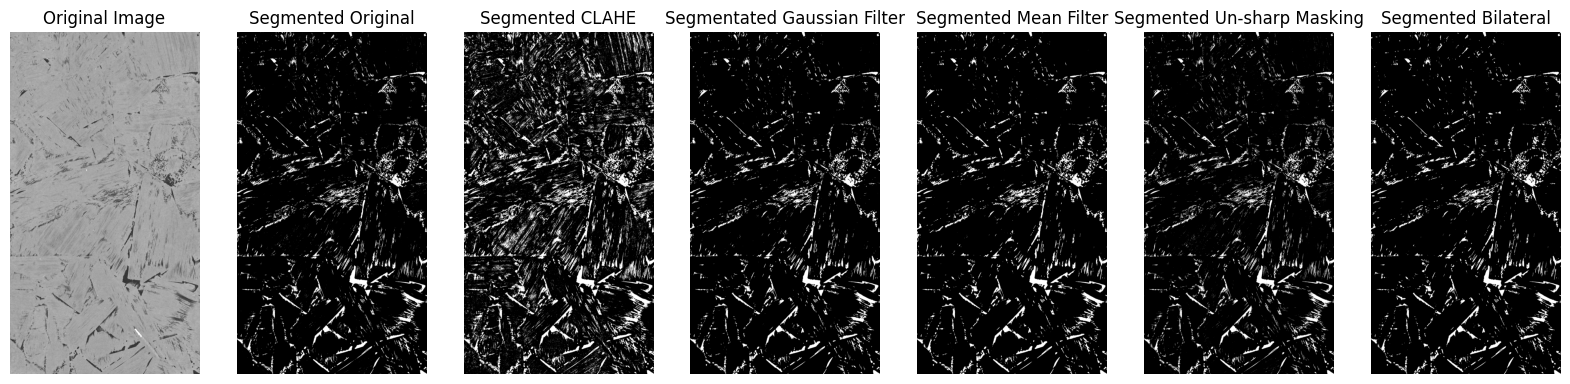

In [ ]:
# display the segmentations results
plt.figure(figsize=(20, 10))

# Display original image
plt.subplot(1, 7, 1)
plt.imshow(cv2.cvtColor(images_dataset[2], cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display original image + segmentation result
plt.subplot(1, 7, 2)
plt.imshow(segmented_images_dataset[2], cmap='gray')
plt.title('Segmented Original')
plt.axis('off')

# Display histogram equalization + segmentation result
plt.subplot(1, 7, 3)
plt.imshow(segmented_images_dataset_CLAHE[2], cmap='gray')
plt.title('Segmented CLAHE')
plt.axis('off')

# Display gaussian filter + segmentation result
plt.subplot(1, 7, 4)
plt.imshow(segmented_images_dataset_gaussian_filter[2], cmap='gray')
plt.title('Segmentated Gaussian Filter')
plt.axis('off')

# Display mean filter + segmentation result
plt.subplot(1, 7, 5)
plt.imshow(segmented_images_dataset_mean_filter[2], cmap='gray')
plt.title('Segmented Mean Filter')
plt.axis('off')

# Display un-sharp masking + segmentation result
plt.subplot(1, 7, 6)
plt.imshow(segmented_images_dataset_Us_masking[2], cmap='gray')
plt.title('Segmented Un-sharp Masking')
plt.axis('off')

# Display bilateral filter + segmentation result
plt.subplot(1, 7, 7)
plt.imshow(segmented_images_dataset_bilateral_filter[2], cmap='gray')
plt.title('Segmented Bilateral')
plt.axis('off')

# Show the plot
plt.show()

First Unlabeled Image:



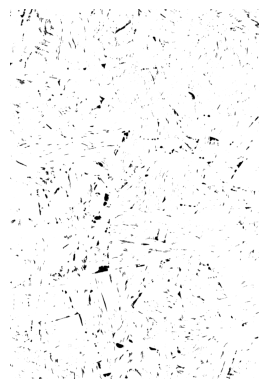


First Labeled Matrix:

[[5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 ...
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]
 [5 5 5 ... 5 5 5]]

Shape of the first unlabeled image: (2830, 1900)
Shape of the first label: (2830, 1900)

Count of each class: 0 is unlabeled, 5 is background, 1-4 are different classes:
Class 5: 5288197
Class 4: 13089
Class 3: 44580
Class 2: 22609
Class 0: 8374
Class 1: 151


In [ ]:
# Select one from the segmentation_lists for now to pair with the labled data
segmented_images_dataset
combined_data = list(zip(segmented_images_dataset, labels_dataset))
combined_data[0][0]

# Display the first image to verify
print("First Unlabeled Image:\n")
plt.imshow(combined_data[0][0], cmap='gray')
plt.axis('off')
plt.show()
print("\nFirst Labeled Matrix:\n")
print(combined_data[0][1])

# cinfirm the shape of labeled and unlabeled data
unlabeled_image_shape = combined_data[0][0].shape
labeled_data_shape = combined_data[0][1].shape

print("\nShape of the first unlabeled image:", unlabeled_image_shape)
print("Shape of the first label:", labeled_data_shape)

# count the number of pixel for each class in the first labeled data
classes_dict = {}
for row in combined_data[0][1]:
  for pixel in row:
    if pixel not in classes_dict:
      classes_dict[pixel] = 1
    else:
      classes_dict[pixel] += 1
print("\nCount of each class: 0 is unlabeled, 5 is background, 1-4 are different classes:")
for k, v in classes_dict.items():
  print(f"Class {k}: {v}")

In [ ]:
# test on binary classification
binary_labels_dataset = []

# Convert multi-class labels to binary (5 => 0 for background, (0-4) => 1 for void)
for _, label_matrix in combined_data:
    binary_label_matrix = np.where(np.logical_or(label_matrix == 0, label_matrix == 5), 0, 1)  # 0 for background (class 5), 1 for voids (classes 0-4)
    binary_labels_dataset.append(binary_label_matrix)

In [ ]:
def evaluate_segmentation(segmented_images, binary_labels):
    X = []
    y = []

    # Flatten each image and corresponding label matrix, then add to X and y
    for image, label_matrix in zip(segmented_images, binary_labels):
        X.extend(image.flatten())  # Add pixel intensities to X
        y.extend(label_matrix.flatten())  # Add binary labels to y

    # Convert X and y to NumPy arrays for compatibility with sklearn
    X = np.array(X).reshape(-1, 1)  # Reshape X to have one feature per sample
    y = np.array(y)

    # Shuffle dataset
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_shuffled, y_shuffled, test_size=0.2, random_state=42)

    # Compute metrics
    accuracy = accuracy_score(y_train, X_train)
    f1_micro = f1_score(y_train, X_train, average='micro')
    f1_macro = f1_score(y_train, X_train, average='macro')
    precision = precision_score(y_train, X_train)
    recall = recall_score(y_train, X_train)
    cm = confusion_matrix(y_train, X_train)

    # Store all the scores in a result dictionary
    res = {
        "Accuracy": accuracy,
        "F1-Micro": f1_micro,
        "F1-Macro": f1_macro,
        "Precision": precision,
        "Recall": recall
    }

    # Optionally print classification report and plot confusion matrix
    print(classification_report(y_train, X_train))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Background', 'Voids'], yticklabels=['Background', 'Voids'])
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    return res

## **Evaluating the preprocessing**

              precision    recall  f1-score   support

           0       1.00      0.88      0.93  39934441
           1       0.21      0.93      0.34   1391219

    accuracy                           0.88  41325660
   macro avg       0.60      0.90      0.64  41325660
weighted avg       0.97      0.88      0.91  41325660



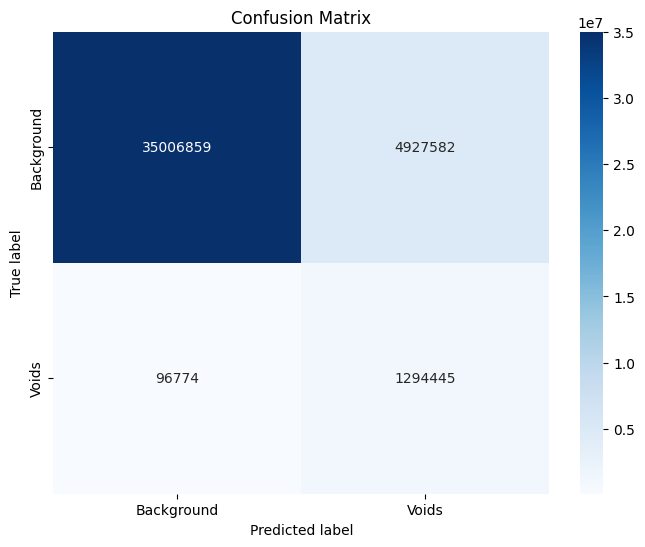

In [ ]:
# Call the function for each enhancement method
res_original_kmean = evaluate_segmentation(segmented_images_dataset, binary_labels_dataset)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99  39934441
           1       0.65      0.97      0.78   1391219

    accuracy                           0.98  41325660
   macro avg       0.82      0.97      0.88  41325660
weighted avg       0.99      0.98      0.98  41325660



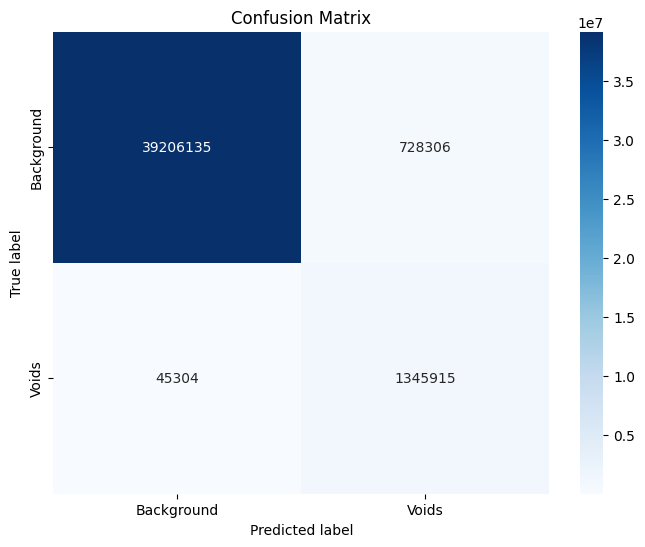

In [ ]:
# Gaussian
res_gaussian_kmean = evaluate_segmentation(segmented_images_dataset_gaussian_filter, binary_labels_dataset)

              precision    recall  f1-score   support

           0       0.99      0.79      0.88  39934441
           1       0.13      0.88      0.22   1391219

    accuracy                           0.79  41325660
   macro avg       0.56      0.83      0.55  41325660
weighted avg       0.97      0.79      0.86  41325660



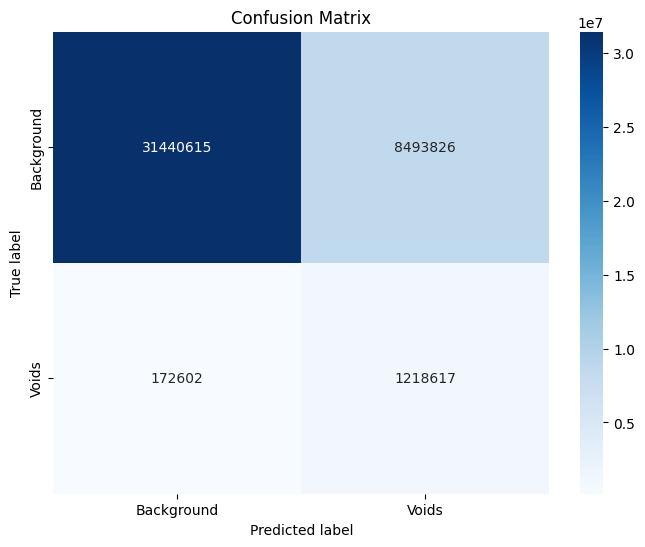

In [ ]:
# Un-sharp Masking
res_sharp_kmean = evaluate_segmentation(segmented_images_dataset_Us_masking, binary_labels_dataset)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99  39934441
           1       0.63      0.95      0.76   1391219

    accuracy                           0.98  41325660
   macro avg       0.82      0.96      0.87  41325660
weighted avg       0.99      0.98      0.98  41325660



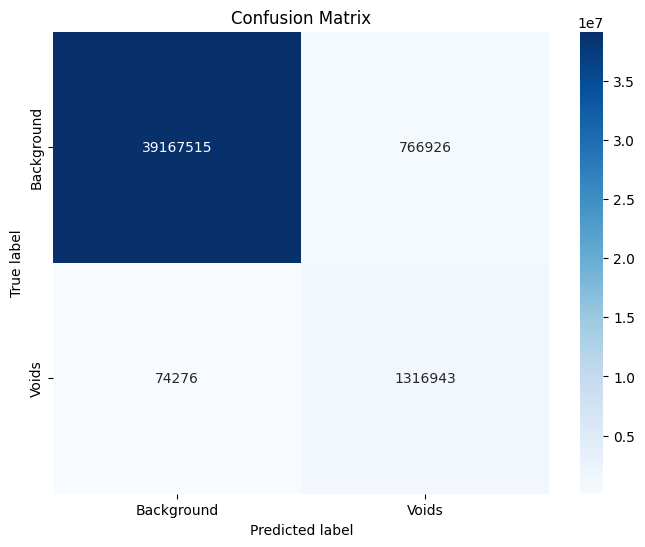

In [ ]:
# Mean Filter
res_mean_kmean = evaluate_segmentation(segmented_images_dataset_mean_filter, binary_labels_dataset)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99  39934441
           1       0.69      0.95      0.80   1391219

    accuracy                           0.98  41325660
   macro avg       0.85      0.97      0.90  41325660
weighted avg       0.99      0.98      0.99  41325660



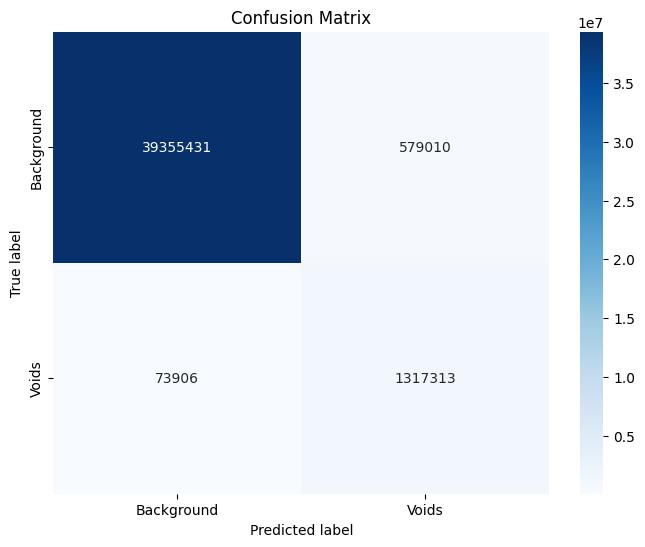

In [ ]:
# Bilateral Filter
res_bilateral_kmean = evaluate_segmentation(segmented_images_dataset_bilateral_filter, binary_labels_dataset)

              precision    recall  f1-score   support

           0       0.97      0.54      0.70  39934441
           1       0.04      0.50      0.07   1391219

    accuracy                           0.54  41325660
   macro avg       0.50      0.52      0.38  41325660
weighted avg       0.94      0.54      0.67  41325660



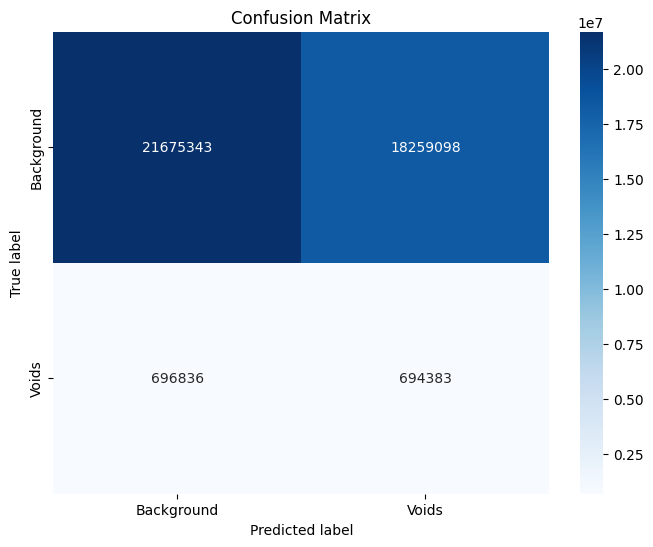

In [ ]:
# CLAHE
res_CLAHE_kmean = evaluate_segmentation(segmented_images_dataset_CLAHE, binary_labels_dataset)

### Summarization of Enhancemnet and Kmeans Segmentation


In [ ]:
res_kmean = [res_original_kmean, res_gaussian_kmean, res_sharp_kmean, res_mean_kmean, res_bilateral_kmean, res_CLAHE_kmean]
res_kmean_df = pd.DataFrame(res_kmean)
res_kmean_df.index = ['Original K-Mean', 'Gaussian Filter + K-Mean', 'Un-sharp Masking + K-Mean', 'Mean Filter + K-Mean', 'Bilateral Filter + Kmean', 'CLAHE + K-Mean']
res_kmean_df = res_kmean_df.style.highlight_max(color='darkgreen', axis=0)
res_kmean_df

,Accuracy,F1-Micro,F1-Macro,Precision,Recall
Original K-Mean,0.878420,0.878420,0.636547,0.208042,0.930439
Gaussian Filter + K-Mean,0.981280,0.981280,0.883497,0.648877,0.967436
Un-sharp Masking + K-Mean,0.790289,0.790289,0.549185,0.125470,0.875935
Mean Filter + K-Mean,0.979645,0.979645,0.873655,0.631970,0.946611
Bilateral Filter + Kmean,0.984201,0.984201,0.896585,0.694667,0.946877
CLAHE + K-Mean,0.541304,0.541304,0.382013,0.036636,0.499118


# **Multi Class**

In [ ]:
# Select the best result from previous step
segmented_images_dataset_bilateral_filter
best_combined_data = list(zip(enhanced_images_dataset_bilateral_filter, labels_dataset))
best_combined_data[0][0]

# cinfirm the shape of labeled and unlabeled data
unlabeled_image_shape = best_combined_data[0][0].shape
labeled_data_shape = best_combined_data[0][1].shape

print("\nShape of the first unlabeled image:", unlabeled_image_shape)
print("Shape of the first label:", labeled_data_shape)

# count the number of pixel for each class in the first labeled data
classes_dict = {}
for row in combined_data[0][1]:
  for pixel in row:
    if pixel not in classes_dict:
      classes_dict[pixel] = 1
    else:
      classes_dict[pixel] += 1
print("\nCount of each class in picture 1: 0 is unlabeled, 5 is background, 1-4 are different classes:")
for k, v in classes_dict.items():
  print(f"Class {k}: {v}")


Shape of the first unlabeled image: (2830, 1900)
Shape of the first label: (2830, 1900)

Count of each class in picture 1: 0 is unlabeled, 5 is background, 1-4 are different classes:
Class 5: 5288197
Class 4: 13089
Class 3: 44580
Class 2: 22609
Class 0: 8374
Class 1: 151


## **Feature Extraction**

In [ ]:
# storing labels
multi_labels_dataset = []

# Convert 0 to background
for _, label_matrix in best_combined_data:
    multi_label_matrix = np.where(np.logical_or(label_matrix == 0, label_matrix == 5), 5, label_matrix)  # 0 for background (class 5)
    multi_labels_dataset.append(multi_label_matrix)

# count the number of pixel for each class in the labeled data
classes_dict_converted_all = {}

for label_matrix in multi_labels_dataset:
    for pixel in label_matrix.flatten():
        if pixel not in classes_dict_converted_all:
            classes_dict_converted_all[pixel] = 1
        else:
            classes_dict_converted_all[pixel] += 1

print("\nGlobal count of each class across all data:")
for k, v in classes_dict_converted_all.items():
    print(f"Class {k}: {v}")


Global count of each class across all data:
Class 5: 49918249
Class 4: 500970
Class 3: 226987
Class 2: 559090
Class 1: 451779


In [ ]:
from image_processing import make_features

# now we need to perform feature extraction
features_list = []
processed_label_list = []
rnd_kernels_list = []

for image, label in best_combined_data:
    # Convert image and label to suitable numpy array if not already
    image_array = np.array(image)
    label_array = np.array(label)

    # Call make_features function
    features, processed_label, rnd_kernels = make_features(
        X=image_array,
        label=label_array,
        random_kernel=(5, 10),
        include_raw_pixels=True,
        edge_kernels_repeats=2,
        general_kernels_repeats=1,
        random_kernels_repeats=1,
        kernels=None  # Use predefined kernels
    )

    # store the results
    features_list.append(features)
    processed_label_list.append(processed_label)
    rnd_kernels_list.append(rnd_kernels)

## **Downsampling**

In [ ]:
# downsample after reshape
def downsample_background_after_reshape(X_train, y_train, background_label=4):
    # Identify background and non-background indices
    background_indices = np.where(y_train == background_label)[0]
    non_background_indices = np.where(y_train != background_label)[0]

    # Downsample background indices
    np.random.seed(42)
    downsampled_background_indices = np.random.choice(background_indices, size=len(non_background_indices)//1, replace=False)

    # Combine downsampled background with non-background
    new_indices = np.concatenate([downsampled_background_indices, non_background_indices])

    # Return downsampled training set
    return X_train[new_indices], y_train[new_indices]


# downsample before reshape
def downsample_background(X_train, y_train):
    downsampled_features_list = []
    downsampled_labels_list = []

    for (feature_matrix, label_matrix) in zip(X_train, y_train):
        # Flatten the label matrix
        label_matrix_flattened = label_matrix.flatten()

        # Flatten the feature matrix to match the label matrix dimensions
        # Assuming feature_matrix shape is (height, width, num_features),
        # We reshape it to (height*width, num_features) to flatten all pixels while preserving their features
        num_features = feature_matrix.shape[-1]  # Assuming the last dimension is for features
        feature_matrix_flattened = feature_matrix.reshape(-1, num_features)

        # Separate background pixels from void pixels
        background_indices = np.where(label_matrix_flattened == 5)[0]
        void_indices = np.where(label_matrix_flattened != 5)[0]

        # Downsample background indices to match the number of void pixels
        np.random.seed(42)  # For reproducibility
        downsampled_background_indices = np.random.choice(background_indices, size=len(void_indices)//10, replace=False)

        # Combine downsampled background with voids
        new_indices = np.concatenate([downsampled_background_indices, void_indices])

        # Store the downsampled features and labels using the new_indices
        downsampled_features = feature_matrix_flattened[new_indices]
        downsampled_labels = label_matrix_flattened[new_indices]

        downsampled_features_list.append(downsampled_features)
        downsampled_labels_list.append(downsampled_labels)

    return downsampled_features_list, downsampled_labels_list

### **Process and split the data**


In [ ]:
# Flatten and reshape
X_reshape = np.concatenate([f.reshape(-1, f.shape[-1]) for f in features_list], axis=0)
y_reshape_multi = np.concatenate([l.flatten() for l in multi_labels_dataset], axis=0) - 1

# Shuffle dataset
X_reshape_shuffled, y_reshape_shuffled_multi = shuffle(X_reshape, y_reshape_multi, random_state=42)

# Split data - Do this before downsampling to keep the test set distribution intact
X_train, X_test, y_train_multi, y_test_multi = train_test_split(
    X_reshape_shuffled, y_reshape_shuffled_multi, test_size=0.2, random_state=42
)

In [ ]:
# Downsample the training set only
X_train_downsampled, y_train_downsampled_multi = downsample_background_after_reshape(X_train, y_train_multi, background_label=4)

## **Semi-supervised Combined Prediction**

In [ ]:
# Generate binary labels from the downsampled multi-class training labels
y_train_binary = (y_train_downsampled_multi != 4).astype(int)

# For the test set, also generate binary labels
y_test_binary = (y_test_multi != 4).astype(int)

# Prepare DMatrix for binary classification with downsampled training data
dtrain_binary = DMatrix(X_train_downsampled, label=y_train_binary)
# Prepare DMatrix for the test set; no downsampling applied
dtest = DMatrix(X_test, label=y_test_binary)

# For multi-class classification, prepare DMatrix with downsampled training data
non_background_indices = np.where(y_train_binary == 1)[0]
X_train_filtered = X_train_downsampled[non_background_indices]
y_train_filtered = y_train_downsampled_multi[non_background_indices]

# Prepare DMatrix for multi-class classification
dtrain_multi = DMatrix(X_train_filtered, label=y_train_filtered)

### Binary

In [ ]:
# def semi_supervised(n_clusters, X_train, X_test, y_train, y_test):
#   # Apply k-means clustering on the training data
#   kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#   clusters_train = kmeans.fit_predict(X_train)
#   clusters_test = kmeans.predict(X_test)

#   # Initialize XGBoost classifiers for each cluster
#   if n_clusters > 2:
#     xgb_classifiers = [xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', seed=42) for _ in range(n_clusters)]
#   else:
#     xgb_classifiers = [xgb.XGBClassifier(use_label_encoder=False, eval_metric='auc', seed=42) for _ in range(n_clusters)]

#   # Train an XGBoost classifier for each cluster
#   for i, classifier in enumerate(xgb_classifiers):
#       # Filter data belonging to the current cluster
#       X_train_cluster = X_train[clusters_train == i]
#       y_train_cluster = y_train[clusters_train == i]

#       # Train the classifier if there are data points in the cluster
#       if len(X_train_cluster) > 0:
#           classifier.fit(X_train_cluster, y_train_cluster)

#   # Make predictions using the local classifiers
#   y_pred = np.zeros(y_test.shape)
#   for i, classifier in enumerate(xgb_classifiers):
#       # Filter test data for the current cluster
#       X_test_cluster = X_test[clusters_test == i]

#       # Make predictions if the cluster has data points
#       if len(X_test_cluster) > 0:
#           y_pred_cluster = classifier.predict(X_test_cluster)
#           y_pred[clusters_test == i] = y_pred_cluster

#   return kmeans, xgb_classifiers, y_pred

def semi_supervised_with_cv(n_clusters, X_train, X_test, y_train, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply k-means clustering on the training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_train = kmeans.fit_predict(X_train_scaled)
    clusters_test = kmeans.predict(X_test_scaled)

    # Initialize XGBoost classifiers for each cluster
    classifiers = []
    threshold_list = []
    best_params_list = []

    for i in range(n_clusters):
        # Filter data belonging to the current cluster
        indices_train = clusters_train == i
        X_train_cluster = X_train_scaled[indices_train]
        y_train_cluster = y_train[indices_train]

        if len(X_train_cluster) > 0:
            # Setup GridSearchCV to find the best parameters for the XGBClassifier
            xgb_model = XGBClassifier(use_label_encoder=False, seed=42)
            param_grid = {
                'max_depth': range(3, 10),
                'subsample': np.arange(0.5, 1.0, 0.1),
                'eta': np.logspace(-3, -1, 3),
            }
            grid_search = GridSearchCV(
                estimator=xgb_model,
                param_grid=param_grid,
                scoring='roc_auc',
                cv=5,
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train_cluster, y_train_cluster)
            best_params = grid_search.best_params_
            best_params_list.append(best_params)
            classifier = grid_search.best_estimator_
            classifiers.append(classifier)

            # Predict probabilities on the test set for the current cluster
            indices_test = clusters_test == i
            X_test_cluster = X_test_scaled[indices_test]
            y_test_cluster = y_test[indices_test]
            if len(X_test_cluster) > 0:
                y_scores_cluster = classifier.predict_proba(X_test_cluster)[:, 1]
                precision, recall, thresholds = precision_recall_curve(y_test_cluster, y_scores_cluster)

                plt.figure(figsize=(6, 4))
                plt.plot(recall, precision, label=f'Cluster {i}')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.title(f'Precision-Recall Curve for Cluster {i}')
                plt.legend()
                plt.show()

                target_precision = 0.89  # Example precision threshold
                threshold = thresholds[np.argmax(precision >= target_precision)]
                threshold_list.append(threshold)
        else:
            classifiers.append(None)
            threshold_list.append(0.5)  # Default threshold
            best_params_list.append(None)

    # Predict with each classifier using the chosen threshold
    y_pred = np.zeros(y_test.shape, dtype=int)
    for i, classifier in enumerate(classifiers):
        if classifier is not None:
            indices = clusters_test == i
            X_test_cluster = X_test_scaled[indices]
            y_scores = classifier.predict_proba(X_test_cluster)[:, 1]
            y_pred_cluster = (y_scores >= threshold_list[i]).astype(int)
            y_pred[indices] = y_pred_cluster

    return kmeans, classifiers, y_pred, threshold_list, best_params_list

def semi_supervised(n_clusters, X_train, X_test, y_train, y_test):
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply k-means clustering on the training data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_train = kmeans.fit_predict(X_train_scaled)
    clusters_test = kmeans.predict(X_test_scaled)

    # Initialize XGBoost classifiers for each cluster
    classifiers = []
    threshold_list = []

    # Train an XGBoost classifier and calculate precision-recall for each cluster
    for i in range(n_clusters):
        # Filter data belonging to the current cluster
        indices_train = clusters_train == i
        X_train_cluster = X_train_scaled[indices_train]
        y_train_cluster = y_train[indices_train]

        if len(X_train_cluster) > 0:
            classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', seed=42)
            classifier.fit(X_train_cluster, y_train_cluster)
            classifiers.append(classifier)

            # Predict probabilities on the test set for the current cluster
            indices_test = clusters_test == i
            X_test_cluster = X_test_scaled[indices_test]
            y_test_cluster = y_test[indices_test]
            if len(X_test_cluster) > 0:
                y_scores_cluster = classifier.predict_proba(X_test_cluster)[:, 1]

                # Calculate precision-recall curve
                precision, recall, thresholds = precision_recall_curve(y_test_cluster, y_scores_cluster)

                # Plot the precision-recall curve
                plt.figure(figsize=(6, 4))
                plt.plot(recall, precision, label=f'Cluster {i}')
                plt.xlabel('Recall')
                plt.ylabel('Precision')
                plt.title(f'Precision-Recall Curve for Cluster {i}')
                plt.legend()
                plt.show()

                # Choose the best threshold: e.g., where precision is at least 0.80
                target_precision = 0.89
                if any(precision >= target_precision):
                    idx = np.where(precision >= target_precision)[0][0]  # Index of the first occurrence
                    threshold = thresholds[idx]
                else:
                    threshold = 0.5  # Default threshold if target precision not reached
                threshold_list.append(threshold)
        else:
            classifiers.append(None)
            threshold_list.append(0.5)  # Default threshold

    # Predict with each classifier and chosen threshold
    y_pred = np.zeros(y_test.shape, dtype=int)
    for i, classifier in enumerate(classifiers):
        if classifier is not None:
            indices = clusters_test == i
            X_test_cluster = X_test_scaled[indices]
            y_scores = classifier.predict_proba(X_test_cluster)[:, 1]
            y_pred_cluster = (y_scores >= threshold_list[i]).astype(int)
            y_pred[indices] = y_pred_cluster

    return kmeans, classifiers, y_pred, threshold_list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Fitting 5 folds for each of 105 candidates, totalling 525 fits


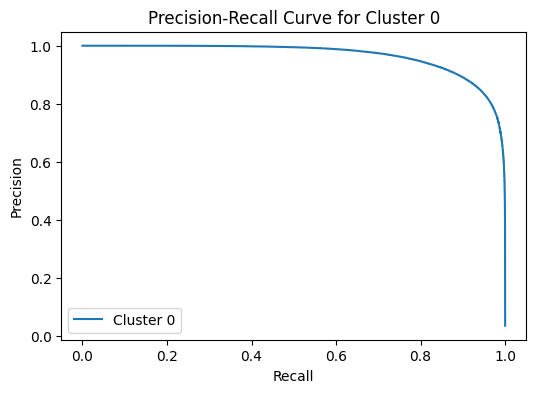

Fitting 5 folds for each of 105 candidates, totalling 525 fits


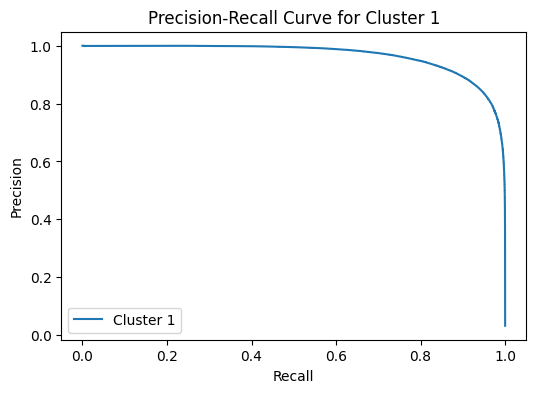

Best parameters for cluster 0: {'eta': 0.09999999999999999, 'max_depth': 9, 'subsample': 0.7999999999999999}
Best parameters for cluster 1: {'eta': 0.09999999999999999, 'max_depth': 9, 'subsample': 0.8999999999999999}
              precision    recall  f1-score   support

  Background       1.00      1.00      1.00   9983808
       Voids       0.89      0.90      0.90    347607

    accuracy                           0.99  10331415
   macro avg       0.94      0.95      0.95  10331415
weighted avg       0.99      0.99      0.99  10331415

Binary Accuracy: 0.9929618546927018
Binary F1 Score (Micro): 0.9929618546927018
Binary F1 Score (Macro): 0.9462425651133699


In [ ]:
k_means, xgb_classifiers, y_pred, thresholds, best_params = semi_supervised_with_cv(2, X_train_downsampled, X_test, y_train_binary, y_test_binary)

# Print the best parameters for each cluster
for i, params in enumerate(best_params):
    if params is not None:
        print(f"Best parameters for cluster {i}: {params}")
    else:
        print(f"No classifier trained for cluster {i} due to lack of data")

# Evaluate the overall performance using binary labels
print(classification_report(y_test_binary, y_pred, target_names=['Background', 'Voids']))

# Compute metrics for binary classification
binary_accuracy = accuracy_score(y_test_binary, y_pred)
binary_f1_micro = f1_score(y_test_binary, y_pred, average='micro')
binary_f1_macro = f1_score(y_test_binary, y_pred, average='macro')

# Print binary-class metrics
print(f"Binary Accuracy: {binary_accuracy}")
print(f"Binary F1 Score (Micro): {binary_f1_micro}")
print(f"Binary F1 Score (Macro): {binary_f1_macro}")

In [ ]:
# Calculate and print detailed classification report with higher precision
detailed_report = classification_report(y_test_binary, y_pred, target_names=['Background', 'Voids'], digits=10, output_dict=True)
print(detailed_report)

{'Background': {'precision': 0.99659805250832, 'recall': 0.9961171128290929, 'f1-score': 0.9963575246315672, 'support': 9983808}, 'Voids': {'precision': 0.8900021281123643, 'recall': 0.902337985138389, 'f1-score': 0.8961276055951727, 'support': 347607}, 'accuracy': 0.9929618546927018, 'macro avg': {'precision': 0.9433000903103421, 'recall': 0.949227548983741, 'f1-score': 0.9462425651133699, 'support': 10331415}, 'weighted avg': {'precision': 0.9930115651305984, 'recall': 0.9929618546927018, 'f1-score': 0.9929852255354139, 'support': 10331415}}


In [ ]:
# Extract precision and recall for Background and Voids
precision_background = detailed_report['Background']['precision']
recall_background = detailed_report['Background']['recall']
precision_voids = detailed_report['Voids']['precision']
recall_voids = detailed_report['Voids']['recall']

# Calculate BF scores using the formula
def bf_score(precision, recall):
    if precision + recall > 0:
        return 2 * (precision * recall) / (precision + recall)
    else:
        return 0.0

def calculate_global_metrics(y_true, y_pred):
    # Calculate global accuracy
    global_accuracy = np.mean(y_true == y_pred)

    # Calculate mean accuracy per class
    conf_matrix = confusion_matrix(y_true, y_pred)
    mean_accuracy = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

    # Calculate IoU per class and mean IoU
    IoUs = jaccard_score(y_true, y_pred, average=None)  # This returns IoU for each class
    mean_IoU = np.mean(IoUs)
    weighted_IoU = np.average(IoUs, weights=np.bincount(y_true))

    return global_accuracy, mean_accuracy, IoUs, mean_IoU, weighted_IoU

bf_score_background = bf_score(precision_background, recall_background)
bf_score_voids = bf_score(precision_voids, recall_voids)

# Example call
y_true = y_test_binary
y_pred = y_pred

global_acc, mean_accs, class_IoUs, mean_IoU, weighted_IoU = calculate_global_metrics(y_true, y_pred)
mean_accuracy = (mean_accs[0] + mean_accs[1]) / 2
background_accuracy = mean_accs[0]
voids_accuracy = mean_accs[1]
background_IoU = class_IoUs[0]
voids_IoU = class_IoUs[1]
mean_bf_score = (bf_score_background + bf_score_voids) / 2

# Print all metrics
print(f"Global Accuracy: {global_acc}")
print(f"Mean Accuracy: {(mean_accs[0] + mean_accs[1]) / 2}")
print(f"Background Accuracy: {mean_accs[0]}, Voids Accuracy: {mean_accs[1]}")
print(f"Background IoU: {background_IoU}, Voids IoU: {voids_IoU}")
print(f"Mean IoU: {mean_IoU}")
print(f"Weighted IoU: {weighted_IoU}")

# Print the BF scores
print(f"BF Score for Background: {bf_score_background}")
print(f"BF Score for Voids: {bf_score_voids}")
print(f"Mean BF Score: {mean_bf_score}")

Global Accuracy: 0.9929618546927018
Mean Accuracy: 0.949227548983741
Background Accuracy: 0.9961171128290929, Voids Accuracy: 0.902337985138389
Background IoU: 0.992741488213528, Voids IoU: 0.811803619818155
Mean IoU: 0.9022725540158415
Weighted IoU: 0.9866537190532232
BF Score for Background: 0.9963575246315672
BF Score for Voids: 0.8961276055951727
Mean BF Score: 0.9462425651133699


In [ ]:
# Create DataFrames for the results
global_df = pd.DataFrame({
    "Semi-Supervised": ["Kmeans + XGboost"],
    "Global Accuracy": [global_acc],
    "Mean Accuracy": [mean_accuracy],
    "Mean IoU": [mean_IoU],
    "Weighted IoU": [weighted_IoU],
    "Mean BF Score": [mean_bf_score]
})

local_df = pd.DataFrame({
    "Semi-Supervised": ["Kmeans + XGboost", "Kmeans + XGboost"],
    "Label Area": ["Void", "Background"],
    "Accuracy": [voids_accuracy, background_accuracy],
    "IoU": [voids_IoU, background_IoU],
    "MeanBFScore [1]": [bf_score_voids, bf_score_background]
})

# Display the DataFrames
print("Global Segmentation Metrics")
global_df




Global Segmentation Metrics


,Semi-Supervised,Global Accuracy,Mean Accuracy,Mean IoU,Weighted IoU,Mean BF Score
0,Kmeans + XGboost,0.992962,0.949228,0.902273,0.986654,0.946243


In [ ]:
print("Individual Segmentation Metrics")
local_df

Individual Segmentation Metrics


,Semi-Supervised,Label Area,Accuracy,IoU,MeanBFScore [1]
0,Kmeans + XGboost,Void,0.902338,0.811804,0.896128
1,Kmeans + XGboost,Background,0.996117,0.992741,0.996358


### Combined

In [ ]:
# def semi_supervised_predict(n_clusters, X_train, X_test, y_train):
#     # Apply k-means clustering
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     clusters_train = kmeans.fit_predict(X_train)
#     clusters_test = kmeans.predict(X_test)

#     # Initialize and train XGBoost classifiers for each cluster
#     xgb_classifiers = [xgb.XGBClassifier(use_label_encoder=False, alpha=10, eval_metric='mlogloss' if n_clusters > 2 else 'auc', seed=42) for _ in range(n_clusters)]
#     for i, classifier in enumerate(xgb_classifiers):
#         X_train_cluster = X_train[clusters_train == i]
#         y_train_cluster = y_train[clusters_train == i]
#         classifier.fit(X_train_cluster, y_train_cluster)

#     # Predict with each classifier
#     y_pred = np.empty(X_test.shape[0], dtype=int)
#     for i, classifier in enumerate(xgb_classifiers):
#         indices = clusters_test == i
#         if np.any(indices):
#             X_test_cluster = X_test[indices]
#             y_pred_cluster = classifier.predict(X_test_cluster)
#             y_pred[indices] = y_pred_cluster

#     return kmeans, xgb_classifiers, y_pred

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

def semi_supervised_predict(n_clusters, X_train, X_test, y_train):
    # Initialize the scaler
    scaler = StandardScaler()

    grid_search_results = []

    # Fit the scaler to the training data and transform both training and test data
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters_train = kmeans.fit_predict(X_train_scaled)
    clusters_test = kmeans.predict(X_test_scaled)

    # Initialize XGBoost classifiers for each cluster and use GridSearchCV to find the best alpha
    xgb_classifiers = []
    for i in range(n_clusters):
        X_train_cluster = X_train_scaled[clusters_train == i]
        y_train_cluster = y_train[clusters_train == i]

        if len(X_train_cluster) > 0:
            xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss' if n_clusters > 2 else 'auc', seed=42)

            param_grid = {
                'max_depth': range(3, 10),
                'subsample': np.arange(0.5, 1.0, 0.1),
                'eta': np.logspace(-3, -1, 3),
            }


            grid_search = GridSearchCV(xgb_model, param_grid, scoring='roc_auc' if n_clusters == 2 else 'neg_log_loss', cv=5, n_jobs=50)
            grid_search.fit(X_train_cluster, y_train_cluster)

            xgb_classifiers.append(grid_search.best_estimator_)

            # # Store results for plotting
            # grid_search_results.append({
            #     'cluster': i,
            #     'alphas': grid_search.cv_results_['param_alpha'].data,
            #     'scores': grid_search.cv_results_['mean_test_score']
            # })

        else:
            xgb_classifiers.append(None)

    # Predict with each best classifier from GridSearchCV
    y_pred = np.empty(X_test_scaled.shape[0], dtype=int)
    for i, classifier in enumerate(xgb_classifiers):
        if classifier is not None:
            indices = clusters_test == i
            if np.any(indices):
                X_test_cluster = X_test_scaled[indices]
                y_pred_cluster = classifier.predict(X_test_cluster)
                y_pred[indices] = y_pred_cluster


    # # Now plot the results
    # plt.figure(figsize=(12, 8))
    # for result in grid_search_results:
    #     plt.plot(result['alphas'], result['scores'], marker='o', label=f'Cluster {result["cluster"]}')

    # plt.xscale('log')
    # plt.xlabel('Alpha')
    # plt.ylabel('Mean Test Score')
    # plt.title('Grid Search Results for Alpha in Each Cluster')
    # plt.legend()
    # plt.show()

    return kmeans, xgb_classifiers, y_pred



# 1. Apply binary classification using semi-supervised learning
kmeans_binary, classifiers_binary, y_binary_pred = semi_supervised_predict(2, X_train_downsampled, X_test, y_train_binary)

# 2. Filter out the non-background data for multi-class classification
non_background_indices = y_binary_pred == 1

# 3. Apply multi-class classification using semi-supervised learning
kmeans_multi, classifiers_multi, y_multi_pred = semi_supervised_predict(4, X_train_filtered, X_test[non_background_indices], y_train_filtered)

# 4. Combine binary and multi-class predictions
y_combined_pred = np.full(y_binary_pred.shape, 4)  # Assuming 4 represents the background in multi-class labels
y_combined_pred[non_background_indices] = y_multi_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Evaluate using original multi-class labels for the test set
print("Multi-Class Classification Report:")
print(classification_report(y_test_multi, y_combined_pred, zero_division=0))

# Compute metrics for multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi, y_combined_pred)
multi_class_f1_micro = f1_score(y_test_multi, y_combined_pred, average='micro')
multi_class_f1_macro = f1_score(y_test_multi, y_combined_pred, average='macro')

# Print multi-class metrics
print(f"Multi-Class Accuracy: {multi_class_accuracy}")
print(f"Multi-Class F1 Score (Micro): {multi_class_f1_micro}")
print(f"Multi-Class F1 Score (Macro): {multi_class_f1_macro}")

# Evaluate binary classification performance
print("\nBinary Classification Report:")
print(classification_report(y_test_binary, y_binary_pred, zero_division=0, target_names=['Background', 'Non-Background']))

# Compute metrics for binary classification
binary_accuracy = accuracy_score(y_test_binary, y_binary_pred)
binary_f1_micro = f1_score(y_test_binary, y_binary_pred, average='micro')
binary_f1_macro = f1_score(y_test_binary, y_binary_pred, average='macro')

# Print binary-class metrics
print(f"Binary Accuracy: {binary_accuracy}")
print(f"Binary F1 Score (Micro): {binary_f1_micro}")
print(f"Binary F1 Score (Macro): {binary_f1_macro}")

Multi-Class Classification Report:


## **XGBoost**

In [ ]:
xgb_classifier = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    seed=42,
    eval_metric='mlogloss'
)

xgb_classifier.fit(X_train_downsampled, y_train_downsampled_multi)

In [ ]:
# Predict and Evaluate
y_pred = xgb_classifier.predict(X_test)
print(classification_report(y_test_multi, y_pred, zero_division=0))

## **One vs Rest XGBoost**

In [ ]:
# Use XGBClassifier within OneVsRestClassifier
ovr_classifier = OneVsRestClassifier(XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss'))

# Train the OneVsRestClassifier with XGBClassifier on downsampled training data
ovr_classifier.fit(X_train_downsampled, y_train_downsampled_multi)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [ ]:
# Predict on the test set
y_pred_labels = ovr_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test_multi, y_pred_labels, labels=np.unique(y_train_downsampled_multi), target_names=np.unique(y_train_downsampled_multi).astype(str)))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     90195
           1       0.32      0.63      0.43    112028
           2       0.27      0.30      0.28     45352
           3       0.31      0.74      0.44    100032
           4       1.00      0.97      0.99   9983808

    accuracy                           0.96  10331415
   macro avg       0.53      0.70      0.59  10331415
weighted avg       0.98      0.96      0.97  10331415



## **Random Forest Classfier**

In [ ]:
# Initialize the classifier
clf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
clf.fit(X_train_downsampled, y_train_downsampled_multi)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Predict
y_pred_rfc = clf.predict(X_test)
print(classification_report(y_test_multi, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80     90195
           1       0.31      0.65      0.42    112028
           2       0.28      0.33      0.30     45352
           3       0.31      0.74      0.44    100032
           4       1.00      0.97      0.99   9983808

    accuracy                           0.96  10331415
   macro avg       0.53      0.71      0.59  10331415
weighted avg       0.98      0.96      0.97  10331415



## **Combined Binary and Multi**

In [ ]:
def data_batch_generator(X, y, batch_size, downsample=False, background_label=4):
    """
    A generator that yields batches of data.
    If downsample is True, it applies downsampling to each batch based on the background label.
    """
    for start in range(0, len(X), batch_size):
        end = min(start + batch_size, len(X))
        X_batch = X[start:end]
        y_batch = y[start:end]

        if downsample:
            # Apply downsampling logic here similar to downsample_background_after_reshape function
            X_batch_downsampled, y_batch_downsampled = downsample_background_after_reshape(X_batch, y_batch, background_label=background_label)
            yield X_batch_downsampled, y_batch_downsampled
        else:
            yield X_batch, y_batch

def train_xgb_with_batches(X_train, y_train, params, batch_size=100):
    # Create a DMatrix for each batch and train incrementally
    for X_batch, y_batch in data_batch_generator(X_train, y_train, batch_size, downsample=True):
        dtrain = DMatrix(X_batch, label=y_batch)
        xgb_model = xgb_train(params, dtrain)
    return xgb_model

from sklearn.base import clone

def train_sklearn_with_batches(classifier, X_train, y_train, batch_size=100):
    clf = clone(classifier)  # Create a fresh copy of the classifier
    for X_batch, y_batch in data_batch_generator(X_train, y_train, batch_size, downsample=True):
        clf.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    return clf


### **Random Forest Classifier**

In [ ]:
# Generate binary labels from the downsampled multi-class training labels
y_train_binary = (y_train_downsampled_multi != 4).astype(int)

non_background_indices = np.where(y_train_binary == 1)[0]
X_train_filtered = X_train_downsampled[non_background_indices]
y_train_multi_filtered = y_train_downsampled_multi[non_background_indices]

# Initialize the classifier
clf_binary = RandomForestClassifier(n_estimators=50, random_state=42)
clf_multi = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the classifier
clf_binary.fit(X_train_downsampled, y_train_binary)
clf_multi.fit(X_train_filtered, y_train_multi_filtered)

def batch_combined_predict_rf(X, rf_binary, rf_multi, background_label=4, batch_size=10000):
    combined_predictions = np.empty(X.shape[0], dtype=int)  # Placeholder for predictions

    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        X_batch = X[start:end]

        # Make binary predictions to filter background/non-background
        binary_pred = rf_binary.predict(X_batch)

        # Initialize predictions with the background label
        batch_predictions = np.full(len(X_batch), background_label, dtype=int)

        # Find indices predicted as non-background
        non_background_indices = np.where(binary_pred == 1)[0]

        if len(non_background_indices) > 0:
            # Make multi-class predictions for non-background instances
            multi_pred = rf_multi.predict(X_batch[non_background_indices])
            batch_predictions[non_background_indices] = multi_pred  # Update predictions for non-background

        combined_predictions[start:end] = batch_predictions

    return combined_predictions

In [ ]:
# Predict
y_pred_rfc = batch_combined_predict_rf(X_test, clf_binary, clf_multi, 4)
print(classification_report(y_test_multi, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     90195
           1       0.27      0.65      0.39    112028
           2       0.23      0.33      0.27     45352
           3       0.31      0.74      0.44    100032
           4       1.00      0.97      0.98   9983808

    accuracy                           0.96  10331415
   macro avg       0.52      0.71      0.58  10331415
weighted avg       0.98      0.96      0.97  10331415



### **XGBoost**

In [ ]:
# Generate binary labels from the downsampled multi-class training labels
y_train_binary = (y_train_downsampled_multi != 4).astype(int)

# For the test set, also generate binary labels
y_test_binary = (y_test_multi != 4).astype(int)

# Prepare DMatrix for binary classification with downsampled training data
dtrain_binary = DMatrix(X_train_downsampled, label=y_train_binary)
# Prepare DMatrix for the test set; no downsampling applied
dtest = DMatrix(X_test, label=y_test_binary)

# For multi-class classification, prepare DMatrix with downsampled training data
non_background_indices = np.where(y_train_binary == 1)[0]
X_train_filtered = X_train_downsampled[non_background_indices]
y_train_filtered = y_train_downsampled_multi[non_background_indices]

# Prepare DMatrix for multi-class classification
dtrain_multi = DMatrix(X_train_filtered, label=y_train_filtered)

In [ ]:
params_binary = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

params_multi = {
    'objective': 'multi:softprob',  # Using softprob for multi-class classification
    'num_class': 4,
    'eval_metric': 'mlogloss',
    'seed': 42
}

# Train binary classifier
xgb_binary = xgb_train(params_binary, dtrain_binary)

# Train multi-class classifier
xgb_multi = xgb_train(params_multi, dtrain_multi)

In [ ]:
def combined_predict(X, xgb_binary, xgb_multi, background_label):
    dtest = DMatrix(X)
    binary_pred_prob = xgb_binary.predict(dtest)
    binary_pred = np.where(binary_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions

    combined_pred = np.full(binary_pred.shape, background_label, dtype=int)

    non_background_indices = np.where(binary_pred == 1)[0]
    if len(non_background_indices) > 0:
        dtest_non_background = DMatrix(X[non_background_indices])
        multi_pred_prob = xgb_multi.predict(dtest_non_background)
        multi_pred = np.argmax(multi_pred_prob, axis=1)  # Convert probabilities to class predictions
        combined_pred[non_background_indices] = multi_pred

    return combined_pred

def batch_combined_predict_rf(X, rf_binary, rf_multi, background_label, batch_size=10000):
    """
    Predict with a RandomForestClassifier over X in batches, combining binary and multi-class predictions.
    """
    combined_predictions = np.empty(X.shape[0], dtype=int)  # Initialize an array to hold the combined predictions

    # Process in batches
    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        X_batch = X[start:end]

        # Binary predictions
        binary_pred = rf_binary.predict(X_batch)

        # Initialize batch predictions as background
        batch_predictions = np.full(binary_pred.shape, background_label, dtype=int)

        # Find non-background predictions
        non_background_indices = np.where(binary_pred == 1)[0]
        if len(non_background_indices) > 0:
            # Multi-class predictions for non-background instances
            multi_pred = rf_multi.predict(X_batch[non_background_indices])
            batch_predictions[non_background_indices] = multi_pred  # Update predictions

        # Store batch predictions
        combined_predictions[start:end] = batch_predictions

    return combined_predictions


def batch_combined_predict(X, xgb_binary, xgb_multi, background_label, batch_size=10000):
    # Initialize an array to hold the combined predictions
    combined_predictions = np.empty(X.shape[0], dtype=int)

    # Process in batches
    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        X_batch = X[start:end]

        dtest_batch = DMatrix(X_batch)
        binary_pred_prob = xgb_binary.predict(dtest_batch)
        binary_pred = np.where(binary_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions

        # Initialize batch predictions as background
        batch_predictions = np.full(binary_pred.shape, background_label, dtype=int)

        # Find non-background predictions
        non_background_indices = np.where(binary_pred == 1)[0]
        if len(non_background_indices) > 0:
            dtest_non_background = DMatrix(X_batch[non_background_indices])
            multi_pred_prob = xgb_multi.predict(dtest_non_background)
            multi_pred = np.argmax(multi_pred_prob, axis=1)  # Convert probabilities to class predictions
            batch_predictions[non_background_indices] = multi_pred

        # Store batch predictions
        combined_predictions[start:end] = batch_predictions

    return combined_predictions


def batch_combined_predict_with_binary_evaluation(X, xgb_binary, xgb_multi, background_label, batch_size=10000):
    # Initialize arrays to hold the combined and binary predictions
    combined_predictions = np.empty(X.shape[0], dtype=int)
    binary_predictions = np.empty(X.shape[0], dtype=int)  # For binary evaluation

    # Process in batches
    for start in range(0, X.shape[0], batch_size):
        end = min(start + batch_size, X.shape[0])
        X_batch = X[start:end]

        dtest_batch = DMatrix(X_batch)
        binary_pred_prob = xgb_binary.predict(dtest_batch)
        binary_pred = np.where(binary_pred_prob > 0.5, 1, 0)  # Convert probabilities to binary predictions

        # Store binary predictions for evaluation
        binary_predictions[start:end] = binary_pred

        # Initialize batch predictions as background for multi-class
        batch_predictions = np.full(binary_pred.shape, background_label, dtype=int)

        # Find non-background predictions
        non_background_indices = np.where(binary_pred == 1)[0]
        if len(non_background_indices) > 0:
            dtest_non_background = DMatrix(X_batch[non_background_indices])
            multi_pred_prob = xgb_multi.predict(dtest_non_background)
            multi_pred = np.argmax(multi_pred_prob, axis=1)
            batch_predictions[non_background_indices] = multi_pred

        # Store combined predictions
        combined_predictions[start:end] = batch_predictions

    return combined_predictions, binary_predictions

In [ ]:
# # Combine predictions
# y_combined_pred = combined_predict(X_test, xgb_binary, xgb_multi, 4)

# # Evaluate using original multi-class labels for the test set
# print(classification_report(y_test_multi, y_combined_pred, zero_division=0))

# Make combined predictions for multi-class and binary classifications
y_combined_pred, y_binary_pred = batch_combined_predict_with_binary_evaluation(
    X_test, xgb_binary, xgb_multi, background_label=4, batch_size=10000
)

# Evaluate using original multi-class labels for the test set
print("Multi-Class Classification Report:")
print(classification_report(y_test_multi, y_combined_pred, zero_division=0))

# Compute metrics for multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi, y_combined_pred)
multi_class_f1_micro = f1_score(y_test_multi, y_combined_pred, average='micro')
multi_class_f1_macro = f1_score(y_test_multi, y_combined_pred, average='macro')

# Print multi-class metrics
print(f"Multi-Class Accuracy: {multi_class_accuracy:.2f}")
print(f"Multi-Class F1 Score (Micro): {multi_class_f1_micro:.2f}")
print(f"Multi-Class F1 Score (Macro): {multi_class_f1_macro:.2f}")

# Evaluate binary classification performance
print("\nBinary Classification Report:")
print(classification_report(y_test_binary, y_binary_pred, zero_division=0, target_names=['Background', 'Non-Background']))

# Compute metrics for binary classification
binary_accuracy = accuracy_score(y_test_binary, y_binary_pred)
binary_f1_micro = f1_score(y_test_binary, y_binary_pred, average='micro')
binary_f1_macro = f1_score(y_test_binary, y_binary_pred, average='macro')

# Print binary-class metrics
print(f"Binary Accuracy: {binary_accuracy:.2f}")
print(f"Binary F1 Score (Micro): {binary_f1_micro:.2f}")
print(f"Binary F1 Score (Macro): {binary_f1_macro:.2f}")



Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     90195
           1       0.35      0.64      0.45    112028
           2       0.36      0.22      0.27     45352
           3       0.34      0.71      0.46    100032
           4       1.00      0.98      0.99   9983808

    accuracy                           0.97  10331415
   macro avg       0.56      0.68      0.60  10331415
weighted avg       0.98      0.97      0.97  10331415

Multi-Class Accuracy: 0.97
Multi-Class F1 Score (Micro): 0.97
Multi-Class F1 Score (Macro): 0.60

Binary Classification Report:
                precision    recall  f1-score   support

    Background       1.00      0.98      0.99   9983808
Non-Background       0.64      0.99      0.78    347607

      accuracy                           0.98  10331415
     macro avg       0.82      0.99      0.88  10331415
  weighted avg       0.99      0.98      0.98  10331415

Binary Ac

## XGBoost Combined Cross-validation l1


In [ ]:
# Generate binary labels from the downsampled multi-class training labels
y_train_binary = (y_train_downsampled_multi != 4).astype(int)

# For the test set, also generate binary labels
y_test_binary = (y_test_multi != 4).astype(int)

# Define a smaller sample size if needed; for example, 10% of the data
sample_size = 0.2

# Stratified sampling for the binary classification
X_train_sample_binary, _, y_train_sample_binary, _ = train_test_split(
    X_train_downsampled, y_train_binary,
    train_size=sample_size,
    stratify=y_train_binary,
    random_state=42
)

# Now you have a stratified sample that maintains the class distribution
# You can proceed to perform cross-validation on X_train_sample_binary and X_train_sample_multi

# For multi-class classification, prepare DMatrix with downsampled training data
non_background_indices = np.where(y_train_binary == 1)[0]
X_train_filtered = X_train_downsampled[non_background_indices]
y_train_filtered = y_train_downsampled_multi[non_background_indices]

# Stratified sampling for the multi-class classification
X_train_sample_multi, _, y_train_sample_multi, _ = train_test_split(
    X_train_filtered, y_train_filtered,
    train_size=sample_size,
    stratify=y_train_filtered,
    random_state=42
)

# Prepare DMatrix for binary classification with downsampled training data
dtrain_binary = DMatrix(X_train_downsampled, label=y_train_binary)
# Prepare DMatrix for the test set; no downsampling applied
dtest = DMatrix(X_test, label=y_test_binary)
# Prepare DMatrix for multi-class classification
dtrain_multi = DMatrix(X_train_filtered, label=y_train_filtered)

# sample dmatrix
dtrain_sample_binary = DMatrix(X_train_sample_binary, label=y_train_sample_binary)
dtrain_sample_multi = DMatrix(X_train_sample_multi, label=y_train_sample_multi)



### Parallel Processing

In [ ]:
# Define your range of values for alpha and lambda
alpha_values = np.logspace(-2, 2, 20)
lambda_values = np.logspace(-2, 2, 20)

# Function to perform cross-validation
def cross_validate(alpha, lambda_, X, y):
    params = {
        'objective': 'binary:logistic',
        'alpha': alpha,
        'lambda': lambda_,
        'eval_metric': 'auc',
        'seed': 42
    }
    dtrain = xgb.DMatrix(X, label=y)  # Convert to DMatrix inside the function
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=100,
        nfold=5,
        metrics='auc',
        early_stopping_rounds=10,
        seed=42
    )
    mean_auc = cv_results['test-auc-mean'].max()
    print(f"Completed CV for alpha: {alpha}, lambda: {lambda_}, AUC: {mean_auc}")
    return alpha, lambda_, mean_auc

# Use Parallel to call the cross_validate function with each combination of hyperparameters
results = Parallel(n_jobs=50, verbose=10)(
    delayed(cross_validate)(alpha, lambda_, X_train_sample_binary, y_train_sample_binary)
    for alpha in alpha_values for lambda_ in lambda_values
)

# Process the results
for result in results:
    alpha, lambda_, mean_auc = result
    print(f"Alpha: {alpha}, Lambda: {lambda_}, Mean AUC: {mean_auc}")

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:  3.4min
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:  4.1min
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:  5.0min
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed:  6.2min
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed:  7.2min
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:  8.5min
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed:  9.8min
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed: 10.8min
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed: 12.6min
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed: 13.7min
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed: 1

Alpha: 0.01, Lambda: 0.01, Mean AUC: 0.9984705982573695
Alpha: 0.01, Lambda: 0.016237767391887217, Mean AUC: 0.9984579561888249
Alpha: 0.01, Lambda: 0.02636650898730358, Mean AUC: 0.9984615006741275
Alpha: 0.01, Lambda: 0.04281332398719393, Mean AUC: 0.9984656250328152
Alpha: 0.01, Lambda: 0.06951927961775606, Mean AUC: 0.9984773850736671
Alpha: 0.01, Lambda: 0.11288378916846889, Mean AUC: 0.9984733274638316
Alpha: 0.01, Lambda: 0.18329807108324359, Mean AUC: 0.9984554602718084
Alpha: 0.01, Lambda: 0.29763514416313175, Mean AUC: 0.9984711044207086
Alpha: 0.01, Lambda: 0.48329302385717526, Mean AUC: 0.9984815461455959
Alpha: 0.01, Lambda: 0.7847599703514611, Mean AUC: 0.9984862071551308
Alpha: 0.01, Lambda: 1.2742749857031335, Mean AUC: 0.9984864516979807
Alpha: 0.01, Lambda: 2.06913808111479, Mean AUC: 0.9984787120265498
Alpha: 0.01, Lambda: 3.359818286283781, Mean AUC: 0.9984921521183487
Alpha: 0.01, Lambda: 5.455594781168514, Mean AUC: 0.9984835925987825
Alpha: 0.01, Lambda: 8.858667

[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed: 29.1min finished


In [ ]:
best_result_binary = 0
best_alpha_binary = 0
best_lambda_binary = 0
mean_auc_scores  = []

for result in results:
  alpha, lambda_, mean_auc = result
  mean_auc_scores.append(mean_auc)
  if mean_auc > best_result_binary:
    best_result_binary = mean_auc
    best_alpha_binary = alpha
    best_lambda_binary = lambda_

print("Alpha binary:", best_alpha_binary, "Lambda binary:", best_lambda_binary, "Best AUC:", best_result_binary)

Alpha binary: 14.38449888287663 Lambda binary: 8.858667904100823 Best AUC: 0.9985072312183979


In [ ]:
# Define your range of values for alpha and lambda
alpha_values = np.logspace(-2, 2, 20)
lambda_values = np.logspace(-2, 2, 20)

# Function to perform cross-validation
def cross_validate(alpha, lambda_, X, y):
    params = {
        'objective': 'multi:softprob',
        'alpha': alpha,
        'lambda': lambda_,
        'num_class': 4,
        'eval_metric': 'mlogloss',
        'seed': 42
    }
    dtrain = xgb.DMatrix(X, label=y)  # Convert to DMatrix inside the function
    cv_results = xgb.cv(
        params,
        dtrain,  # Using the sample DMatrix for multi-class
        num_boost_round=100,
        nfold=5,
        metrics='mlogloss',
        early_stopping_rounds=10,
        seed=42
    )
    mean_logloss_multi = cv_results['test-mlogloss-mean'].min()
    return alpha, lambda_, mean_logloss_multi

# Use Parallel to call the cross_validate function with each combination of hyperparameters
results_multi = Parallel(n_jobs=50, verbose=10)(
    delayed(cross_validate)(alpha, lambda_, X_train_sample_multi, y_train_sample_multi)
    for alpha in alpha_values for lambda_ in lambda_values
)

# Process the results
for result in results_multi:
    alpha, lambda_, mean_logloss = result
    print(f"Alpha: {alpha}, Lambda: {lambda_}, Mean AUC: {mean_logloss}")

[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done  13 tasks      | elapsed:  7.9min
[Parallel(n_jobs=50)]: Done  28 tasks      | elapsed:  8.7min
[Parallel(n_jobs=50)]: Done  45 tasks      | elapsed:  9.5min
[Parallel(n_jobs=50)]: Done  62 tasks      | elapsed: 15.5min
[Parallel(n_jobs=50)]: Done  81 tasks      | elapsed: 16.3min
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed: 22.0min
[Parallel(n_jobs=50)]: Done 121 tasks      | elapsed: 23.4min
[Parallel(n_jobs=50)]: Done 142 tasks      | elapsed: 25.4min
[Parallel(n_jobs=50)]: Done 165 tasks      | elapsed: 30.7min
[Parallel(n_jobs=50)]: Done 188 tasks      | elapsed: 32.7min
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=50)]: Done 213 tasks      | elapsed: 3

Alpha: 0.01, Lambda: 0.01, Mean AUC: 0.7750407568883764
Alpha: 0.01, Lambda: 0.016237767391887217, Mean AUC: 0.7754417780347613
Alpha: 0.01, Lambda: 0.02636650898730358, Mean AUC: 0.7749787816674077
Alpha: 0.01, Lambda: 0.04281332398719393, Mean AUC: 0.7749574117235527
Alpha: 0.01, Lambda: 0.06951927961775606, Mean AUC: 0.7747970149131204
Alpha: 0.01, Lambda: 0.11288378916846889, Mean AUC: 0.7740997395351162
Alpha: 0.01, Lambda: 0.18329807108324359, Mean AUC: 0.7750067026238133
Alpha: 0.01, Lambda: 0.29763514416313175, Mean AUC: 0.7746739200799804
Alpha: 0.01, Lambda: 0.48329302385717526, Mean AUC: 0.774653810051746
Alpha: 0.01, Lambda: 0.7847599703514611, Mean AUC: 0.7743973143107925
Alpha: 0.01, Lambda: 1.2742749857031335, Mean AUC: 0.7738550762293188
Alpha: 0.01, Lambda: 2.06913808111479, Mean AUC: 0.7734714931696545
Alpha: 0.01, Lambda: 3.359818286283781, Mean AUC: 0.77328551030292
Alpha: 0.01, Lambda: 5.455594781168514, Mean AUC: 0.772791600457092
Alpha: 0.01, Lambda: 8.8586679041

[Parallel(n_jobs=50)]: Done 400 out of 400 | elapsed: 68.1min finished


In [ ]:
best_result_multi = 1
best_alpha_multi = 0
best_lambda_multi = 0
log_loss = []

for result in results_multi:
  alpha, lambda_, loss = result
  log_loss.append(loss)
  if loss < best_result_multi:
    best_result_multi = loss
    best_alpha_multi = alpha
    best_lambda_multi = lambda_

print("Alpha binary:", best_alpha_multi, "Lambda binary:", best_lambda_multi, "Best AUC:", best_result_multi)

Alpha binary: 8.858667904100823 Lambda binary: 0.7847599703514611 Best AUC: 0.7704515394777312


In [ ]:
# Define a range of alpha values for L1 regularization
alpha_values = np.logspace(-2, 2, 10)  # 10 values from 10^-4 to 10^2
lambda_values = np.logspace(-2, 2, 10)

# Placeholder for mean AUC scores for each alpha
mean_auc_scores = []

# Perform cross-validation for each alpha
for alpha in alpha_values:
  for lambda_ in lambda_values:
    params = {
        'objective': 'binary:logistic',
        'alpha': alpha,
        'lambda': lambda_,
        'eval_metric': 'auc',
        'seed': 42
    }

    # xgb.cv does not accept a DMatrix directly, but it needs the data in a format before conversion to DMatrix
    cv_results = xgb.cv(
        params,
        dtrain_binary,
        num_boost_round=100,
        nfold=5,
        metrics='auc',
        early_stopping_rounds=10,
        seed=42
    )

    # Get the mean AUC score and append it to the list
    mean_auc = cv_results['test-auc-mean'].max()
    mean_auc_scores.append(mean_auc)
    print(f"Alpha: {alpha} Lambda: {lambda_}, AUC: {mean_auc}")

Alpha: 0.01 Lambda: 0.01, AUC: 0.9986693470273094
Alpha: 0.01 Lambda: 0.027825594022071243, AUC: 0.9986659828471944
Alpha: 0.01 Lambda: 0.0774263682681127, AUC: 0.9986670300023814
Alpha: 0.01 Lambda: 0.21544346900318834, AUC: 0.9986716586236902
Alpha: 0.01 Lambda: 0.5994842503189408, AUC: 0.9986796498744812
Alpha: 0.01 Lambda: 1.668100537200059, AUC: 0.9986838965655013
Alpha: 0.01 Lambda: 4.641588833612777, AUC: 0.9986833818157297
Alpha: 0.01 Lambda: 12.915496650148826, AUC: 0.9986915981013087
Alpha: 0.01 Lambda: 35.93813663804626, AUC: 0.9986840536085996
Alpha: 0.01 Lambda: 100.0, AUC: 0.9986833016100247
Alpha: 0.027825594022071243 Lambda: 0.01, AUC: 0.99866760878575
Alpha: 0.027825594022071243 Lambda: 0.027825594022071243, AUC: 0.9986703043280567
Alpha: 0.027825594022071243 Lambda: 0.0774263682681127, AUC: 0.9986690222303594
Alpha: 0.027825594022071243 Lambda: 0.21544346900318834, AUC: 0.9986733137891948
Alpha: 0.027825594022071243 Lambda: 0.5994842503189408, AUC: 0.9986792020476578


<Figure size 1200x800 with 0 Axes>

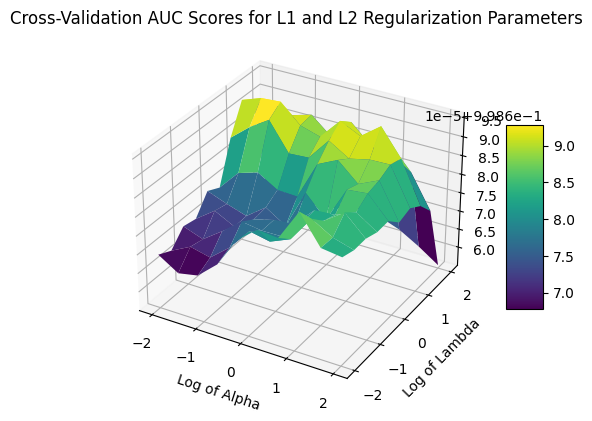

In [ ]:
# # Plotting the graph of AUC scores for each alpha
# plt.figure(figsize=(10, 6))
# plt.plot(alpha_values, lambda_values, mean_auc_scores, marker='o')
# plt.xscale('log')
# plt.xlabel('Alpha')
# plt.ylabel('Mean AUC Score')
# plt.title('Cross-Validation AUC Score for Different Alpha Values')
# plt.show()
# Plotting the graph
plt.figure(figsize=(12, 8))

# Creating 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Converting to 2D arrays for plotting
alpha_grid, lambda_grid = np.meshgrid(alpha_values, lambda_values)
auc_scores_grid = np.array(mean_auc_scores).reshape(len(alpha_values), len(lambda_values))

# Plotting the surface
surf = ax.plot_surface(np.log10(alpha_grid), np.log10(lambda_grid), auc_scores_grid, cmap='viridis')

# Labels and title
ax.set_xlabel('Log of Alpha')
ax.set_ylabel('Log of Lambda')
ax.set_zlabel('Mean AUC Score')
ax.set_title('Cross-Validation AUC Scores for L1 and L2 Regularization Parameters')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
# Placeholder for mean AUC scores for multi-class classification
mean_logloss_scores_multi = []

# Perform cross-validation for each alpha for multi-class classification
for alpha in alpha_values:
  for lambda_ in lambda_values:
    params = {
        'objective': 'multi:softprob',
        'alpha': alpha,
        'lambda': lambda_,
        'num_class': 4,
        'eval_metric': 'mlogloss',
        'seed': 42
    }

    cv_results = xgb.cv(
        params,
        dtrain_sample_multi,  # Using the sample DMatrix for multi-class
        num_boost_round=100,
        nfold=5,
        metrics='mlogloss',
        early_stopping_rounds=10,
        seed=42
    )

    # Get the mean AUC score and append it to the list for multi-class
    mean_logloss_multi = cv_results['test-mlogloss-mean'].min()  # Using min since it's a loss (lower is better)
    mean_logloss_scores_multi.append(mean_logloss_multi)
    print(f"Alpha: {alpha} Lambda: {lambda_}, loss: {mean_logloss_multi}")

Alpha: 0.01 Lambda: 0.01, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 0.027825594022071243, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 0.0774263682681127, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 0.21544346900318834, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 0.5994842503189408, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 1.668100537200059, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 4.641588833612777, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 12.915496650148826, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 35.93813663804626, AUC: 0.998655699653493
Alpha: 0.01 Lambda: 100.0, AUC: 0.998655699653493
Alpha: 0.027825594022071243 Lambda: 0.01, AUC: 0.998655699653493
Alpha: 0.027825594022071243 Lambda: 0.027825594022071243, AUC: 0.998655699653493
Alpha: 0.027825594022071243 Lambda: 0.0774263682681127, AUC: 0.998655699653493
Alpha: 0.027825594022071243 Lambda: 0.21544346900318834, AUC: 0.998655699653493
Alpha: 0.027825594022071243 Lambda: 0.5994842503189408, AUC: 0.998655699653493
Alpha: 0.0278

In [ ]:
# Plotting the graph of AUC scores for each alpha for multi-class
# plt.figure(figsize=(10, 6))
# plt.plot(alpha_values, mean_auc_scores_multi, marker='o', label='Multi-Class')
# plt.xscale('log')
# plt.xlabel('Alpha')
# plt.ylabel('Mean Logloss')
# plt.title('Cross-Validation Logloss for Different Alpha Values')
# plt.legend()
# plt.show()
plt.figure(figsize=(12, 8))

# Creating 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Converting to 2D arrays for plotting
alpha_grid, lambda_grid = np.meshgrid(alpha_values, lambda_values)
auc_scores_grid_multi = np.array(mean_logloss_scores_multi).reshape(len(alpha_values), len(lambda_values))

# Plotting the surface
surf = ax.plot_surface(np.log10(alpha_grid), np.log10(lambda_grid), auc_scores_grid_multi, cmap='viridis')

# Labels and title
ax.set_xlabel('Log of Alpha')
ax.set_ylabel('Log of Lambda')
ax.set_zlabel('Mean Log-loss Multi')
ax.set_title('Multi-Class Cross-Validation log-loss for L1 and L2 Regularization Parameters')

# Adding a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Best alpha and lambda

In [ ]:
# Assuming alpha_values[index_of_best_alpha] gives the best alpha for binary classification
best_alpha_binary = alpha_values[np.argmax(mean_auc_scores)]
best_lambda_binary = lambda_values[np.argmax(mean_auc_scores)]
# Assuming alpha_values[index_of_best_alpha_multi] gives the best alpha for multi-class classification
best_alpha_multi = alpha_values[np.argmin(mean_logloss_scores_multi)]
best_lambda_multi = lambda_values[np.argmin(mean_logloss_scores_multi)]

print("Alpha binary:", best_alpha_binary, "Lambda binary:", best_lambda_multi)
print("Alpha multi:", best_alpha_multi, "Lambda multi:", best_lambda_multi)

Alpha binary: 23.357214690901213
Alpha multi: 11.288378916846883


### Use the best alphas and lambda to train

In [ ]:
params_binary = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'alpha': 20
}

params_multi = {
    'objective': 'multi:softprob',  # Using softprob for multi-class classification
    'num_class': 4,
    'eval_metric': 'mlogloss',
    'alpha': 10,
    'seed': 42
}

# Train binary classifier
xgb_binary = xgb_train(params_binary, dtrain_binary)

# Train multi-class classifier
xgb_multi = xgb_train(params_multi, dtrain_multi)

In [ ]:
y_combined_pred, y_binary_pred = batch_combined_predict_with_binary_evaluation(
    X_test, xgb_binary, xgb_multi, background_label=4, batch_size=10000
)

# Evaluate using original multi-class labels for the test set
print("Multi-Class Classification Report:")
print(classification_report(y_test_multi, y_combined_pred, zero_division=0))

# Compute metrics for multi-class classification
multi_class_accuracy = accuracy_score(y_test_multi, y_combined_pred)
multi_class_f1_micro = f1_score(y_test_multi, y_combined_pred, average='micro')
multi_class_f1_macro = f1_score(y_test_multi, y_combined_pred, average='macro')

# Print multi-class metrics
print(f"Multi-Class Accuracy: {multi_class_accuracy}")
print(f"Multi-Class F1 Score (Micro): {multi_class_f1_micro}")
print(f"Multi-Class F1 Score (Macro): {multi_class_f1_macro}")

# Evaluate binary classification performance
print("\nBinary Classification Report:")
print(classification_report(y_test_binary, y_binary_pred, zero_division=0, target_names=['Background', 'Non-Background']))

# Compute metrics for binary classification
binary_accuracy = accuracy_score(y_test_binary, y_binary_pred)
binary_f1_micro = f1_score(y_test_binary, y_binary_pred, average='micro')
binary_f1_macro = f1_score(y_test_binary, y_binary_pred, average='macro')

# Print binary-class metrics
print(f"Binary Accuracy: {binary_accuracy}")
print(f"Binary F1 Score (Micro): {binary_f1_micro}")
print(f"Binary F1 Score (Macro): {binary_f1_macro}")

Multi-Class Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79     90195
           1       0.35      0.62      0.45    112028
           2       0.40      0.24      0.30     45352
           3       0.33      0.71      0.46    100032
           4       1.00      0.98      0.99   9983808

    accuracy                           0.97  10331415
   macro avg       0.57      0.68      0.60  10331415
weighted avg       0.98      0.97      0.97  10331415

Multi-Class Accuracy: 0.9694553940578323
Multi-Class F1 Score (Micro): 0.9694553940578323
Multi-Class F1 Score (Macro): 0.5973076919401674

Binary Classification Report:
                precision    recall  f1-score   support

    Background       1.00      0.98      0.99   9983808
Non-Background       0.64      0.99      0.78    347607

      accuracy                           0.98  10331415
     macro avg       0.82      0.99      0.88  10331415
  weighted avg       0.9